In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, r2_score
)
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression Model
log_model = LogisticRegression(random_state=42, max_iter=500)  # Adjust iterations if needed
log_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = log_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rpt = classification_report(y_test, y_pred)

# Calculate R-squared (pseudo R-squared for logistic regression)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"R-squared: {r2:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rpt)

# Step 5: Visualize the Fitted Logistic Curve (only for a single feature example)
# Note: Logistic regression is multidimensional; plotting logistic curve works best with one feature.
if X.shape[1] == 1:  # Single feature
    X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_prob = log_model.predict_proba(scaler.transform(X_plot))[:, 1]  # Probability for class 1

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data Points', alpha=0.6)
    plt.plot(X_plot, y_prob, color='red', label='Fitted Logistic Curve')
    plt.xlabel('Feature')
    plt.ylabel('Probability')
    plt.title('Fitted Logistic Curve')
    plt.legend()
    plt.show()

# Optional: ROC-AUC for reference (if it's binary or one-vs-rest for multiclass)
try:
    roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test), multi_class='ovr', average='weighted')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
except:
    print("ROC-AUC Score not computed for multiclass without probabilities.")


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
R-squared: 0.96

Confusion Matrix:
[[ 86   0   0   0]
 [ 13  64  16   0]
 [  0   0 166   1]
 [  0   0   2 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        86
           1       1.00      0.69      0.82        93
           2       0.90      0.99      0.95       167
           3       1.00      0.99      0.99       288

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.92       634
weighted avg       0.95      0.95      0.95       634

ROC-AUC Score: 1.00


Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.83
R-squared: 0.87

Confusion Matrix:
[[ 85   1   0   0]
 [ 16  18  59   0]
 [  0   6 152   9]
 [  0   0   1 287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        86
           1       0.72      0.19      0.31        93
           2       0.72      0.91      0.80       167
           3       0.97      1.00      0.98       288

    accuracy                           0.85       634
   macro avg       0.81      0.77      0.75       634
weighted avg       0.85      0.85      0.83       634



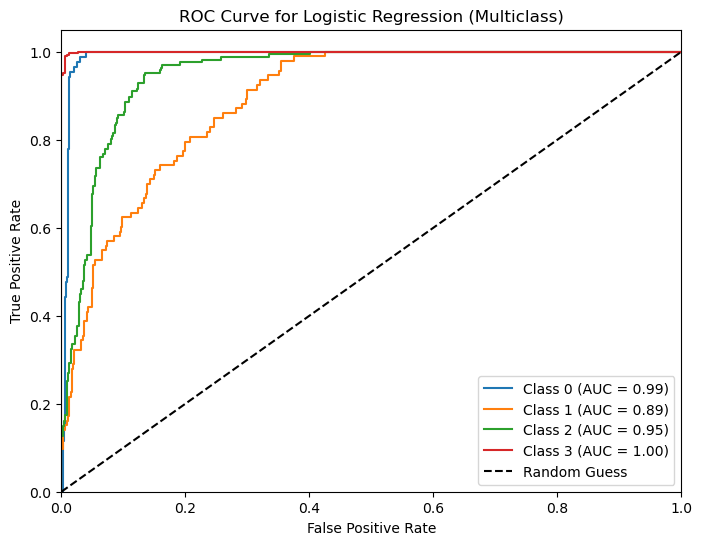

Weighted ROC-AUC Score: 0.97


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, r2_score, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression Model
log_model = LogisticRegression(random_state=42, max_iter=500, multi_class="ovr")  # Adjust iterations if needed
log_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = log_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rpt = classification_report(y_test, y_pred)

# Calculate R-squared (pseudo R-squared for logistic regression)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"R-squared: {r2:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rpt)

# Step 5: Visualize ROC Curve for Multiclass
# Binarize the output labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Get probabilities
y_score = log_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Multiclass)')
plt.legend(loc='lower right')
plt.show()

# Compute weighted average AUC (optional)
try:
    weighted_roc_auc = roc_auc_score(y_test_binarized, y_score, average="weighted", multi_class="ovr")
    print(f"Weighted ROC-AUC Score: {weighted_roc_auc:.2f}")
except:
    print("ROC-AUC Score not computed for multiclass without probabilities.")


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, log_loss
from sklearn.preprocessing import StandardScaler
from scipy.special import softmax

# Load and prepare the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
logistic_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

# Predictions
logistic_pred = logistic_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Metrics for Logistic Regression
logistic_probabilities = logistic_model.predict_proba(X_test)  # Predicted probabilities
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred, average='weighted')
logistic_precision = precision_score(y_test, logistic_pred, average='weighted')
logistic_recall = recall_score(y_test, logistic_pred, average='weighted')
logistic_log_loss = log_loss(y_test, logistic_probabilities)

# Print Logistic Regression Metrics
print("Logistic Regression Results:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")
print(f"F1 Score: {logistic_f1:.2f}")
print(f"Log Loss: {logistic_log_loss:.4f}")
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, logistic_pred))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, logistic_pred))

# Metrics for Ridge Regression
ridge_decision_function = ridge_model.decision_function(X_test)  # Raw prediction scores
ridge_probabilities = softmax(ridge_decision_function, axis=1)  # Convert to probabilities using softmax
ridge_accuracy = accuracy_score(y_test, ridge_pred)
ridge_f1 = f1_score(y_test, ridge_pred, average='weighted')
ridge_precision = precision_score(y_test, ridge_pred, average='weighted')
ridge_recall = recall_score(y_test, ridge_pred, average='weighted')
ridge_log_loss = log_loss(y_test, ridge_probabilities)

# Print Ridge Regression Metrics
print("\nRidge Regression Results:")
print(f"Accuracy: {ridge_accuracy:.2f}")
print(f"Precision: {ridge_precision:.2f}")
print(f"Recall: {ridge_recall:.2f}")
print(f"F1 Score: {ridge_f1:.2f}")
print(f"Log Loss: {ridge_log_loss:.4f}")
print("\nConfusion Matrix (Ridge Regression):")
print(confusion_matrix(y_test, ridge_pred))
print("\nClassification Report (Ridge Regression):")
print(classification_report(y_test, ridge_pred))


Logistic Regression Results:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Log Loss: 0.2082

Confusion Matrix (Logistic Regression):
[[ 86   0   0   0]
 [ 13  64  16   0]
 [  0   0 166   1]
 [  0   0   2 286]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        86
           1       1.00      0.69      0.82        93
           2       0.90      0.99      0.95       167
           3       1.00      0.99      0.99       288

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.92       634
weighted avg       0.95      0.95      0.95       634


Ridge Regression Results:
Accuracy: 0.69
Precision: 0.62
Recall: 0.69
F1 Score: 0.65
Log Loss: 0.8931

Confusion Matrix (Ridge Regression):
[[ 58  13  15   0]
 [ 42   3  48   0]
 [ 12   7  94  54]
 [  0   0   7 281]]

Classification Report (Ridge Regression):
              precision    recall  

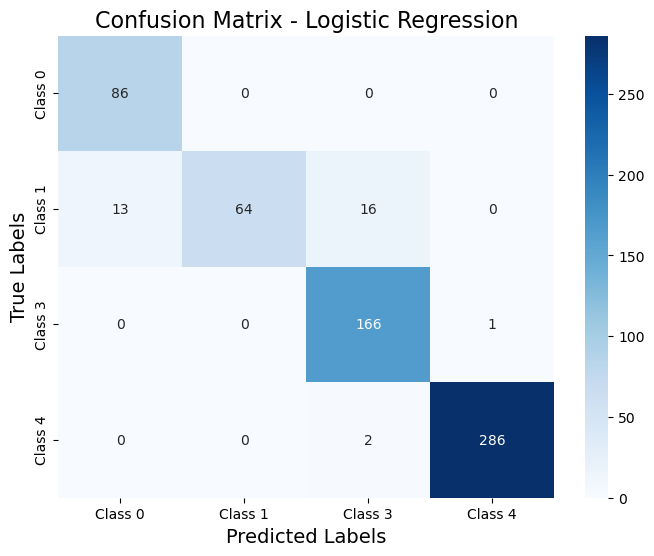

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix data
conf_matrix = np.array([[86, 0, 0, 0],
                        [13, 64, 16, 0],
                        [0, 0, 166, 1],
                        [0, 0, 2, 286]])

# Class labels
class_labels = ["Class 0", "Class 1", "Class 3", "Class 4"]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Adding titles and labels
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

# Show the heatmap
plt.show()


In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("encoded_dataset.csv")  # Replace with your dataset path

# Step 2: Select features and target
# Assuming all features except the target column should be included
X = data.drop(columns=["Broad_Class_Encoded"])  # Replace 'Obesity_Level' with the target variable name
y = data["Broad_Class_Encoded"]  # Replace with the actual target column name

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Add a constant for logistic regression intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Step 5: Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Step 6: Display the model summary
print(result.summary())

# Step 7: Calculate Odds Ratios and Confidence Intervals
odds_ratios = np.exp(result.params)
conf_intervals = np.exp(result.conf_int())

print("\nOdds Ratios:")
print(odds_ratios)

print("\n95% Confidence Intervals for Odds Ratios:")
print(conf_intervals)

# Step 8: Identify significant predictors
p_values = result.pvalues
significant_predictors = p_values[p_values < 0.05]
print("\nSignificant Predictors (p-value < 0.05):")
print(significant_predictors)

# Step 9: Make predictions on the test set
y_pred_prob = result.predict(X_test_const)
y_pred = np.round(y_pred_prob)  # Adjust for multiclass as necessary

# Step 10: Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 11: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)  # Adjust `pos_label` for multiclass
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (All Features)')
plt.legend(loc="lower right")
plt.show()


ValueError: endog must be in the unit interval.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, r2_score
)
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression Model
log_model = LogisticRegression(random_state=42, max_iter=500)  # Adjust iterations if needed
log_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = log_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rpt = classification_report(y_test, y_pred)

# Calculate R-squared (pseudo R-squared for logistic regression)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"R-squared: {r2:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rpt)

# Step 5: Statsmodels for Odds Ratios and P-values
X_train_const = sm.add_constant(X_train)  # Add constant for intercept
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Display model summary
print(result.summary())

# Calculate Odds Ratios
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

# Calculate 95% Confidence Intervals
conf_intervals = np.exp(result.conf_int())
print("\n95% Confidence Intervals for Odds Ratios:")
print(conf_intervals)

# Identify significant predictors
p_values = result.pvalues
significant_predictors = p_values[p_values < 0.05]
print("\nSignificant Predictors (p-value < 0.05):")
print(significant_predictors)

# Step 6: Visualize the Fitted Logistic Curve (only for a single feature example)
if X.shape[1] == 1:  # Single feature
    X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_prob = log_model.predict_proba(scaler.transform(X_plot))[:, 1]  # Probability for class 1

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data Points', alpha=0.6)
    plt.plot(X_plot, y_prob, color='red', label='Fitted Logistic Curve')
    plt.xlabel('Feature')
    plt.ylabel('Probability')
    plt.title('Fitted Logistic Curve')
    plt.legend()
    plt.show()

# Optional: ROC-AUC for reference (if it's binary or one-vs-rest for multiclass)
try:
    roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test), multi_class='ovr', average='weighted')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
except:
    print("ROC-AUC Score not computed for multiclass without probabilities.")


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
R-squared: 0.96

Confusion Matrix:
[[ 86   0   0   0]
 [ 13  64  16   0]
 [  0   0 166   1]
 [  0   0   2 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        86
           1       1.00      0.69      0.82        93
           2       0.90      0.99      0.95       167
           3       1.00      0.99      0.99       288

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.92       634
weighted avg       0.95      0.95      0.95       634



ValueError: endog must be in the unit interval.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, r2_score
)
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Statsmodels for Multinomial Logistic Regression
X_train_const = sm.add_constant(X_train)  # Add constant for intercept
mnlogit_model = sm.MNLogit(y_train, X_train_const)
result = mnlogit_model.fit()

# Display model summary
print(result.summary())

# Calculate Odds Ratios
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

# Calculate 95% Confidence Intervals
conf_intervals = np.exp(result.conf_int())
print("\n95% Confidence Intervals for Odds Ratios:")
print(conf_intervals)

# Identify significant predictors
p_values = result.pvalues
significant_predictors = p_values[p_values < 0.05]
print("\nSignificant Predictors (p-value < 0.05):")
print(significant_predictors)

# Step 4: Predict and Evaluate (Sklearn for Logistic Regression Metrics)
log_model = LogisticRegression(random_state=42, max_iter=500, multi_class='multinomial')  # Adjust iterations if needed
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rpt = classification_report(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rpt)


Optimization terminated successfully.
         Current function value: nan
         Iterations 12
                           MNLogit Regression Results                          
Dep. Variable:     Broad_Class_Encoded   No. Observations:                 1477
Model:                         MNLogit   Df Residuals:                     1444
Method:                            MLE   Df Model:                           30
Date:                 Wed, 15 Jan 2025   Pseudo R-squ.:                     nan
Time:                         19:34:43   Log-Likelihood:                    nan
converged:                        True   LL-Null:                       -1832.0
Covariance Type:             nonrobust   LLR p-value:                       nan
Broad_Class_Encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                        nan        nan        nan        nan         nan     

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Checking target variable:
[1 2 3 0]
Missing values in target: 0
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95

Confusion Matrix:
[[ 86   0   0   0]
 [ 13  64  16   0]
 [  0   0 166   1]
 [  0   0   2 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        86
           1       1.00      0.69      0.82        93
           2       0.90      0.99      0.95       167
           3       1.00      0.99      0.99       288

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.92       634
weighted avg       0.95      0.95      0.95       634

Optimization terminated successfully.
         Current function value: nan
         Iterations 12


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


                           MNLogit Regression Results                          
Dep. Variable:     Broad_Class_Encoded   No. Observations:                 1477
Model:                         MNLogit   Df Residuals:                     1444
Method:                            MLE   Df Model:                           30
Date:                 Wed, 15 Jan 2025   Pseudo R-squ.:                     nan
Time:                         19:40:19   Log-Likelihood:                    nan
converged:                        True   LL-Null:                       -1832.0
Covariance Type:             nonrobust   LLR p-value:                       nan
Broad_Class_Encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                        nan        nan        nan        nan         nan         nan
x1                           nan        nan        nan        nan         nan         nan


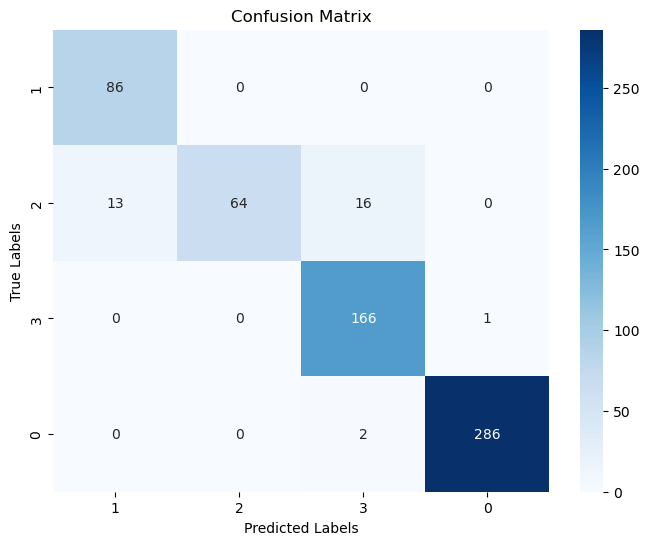


Feature Importance for Class 0:
Weight: -9.9022
Height: 2.8265
Age: -0.4426
FCVC: 0.3456
FAVC: -0.1114
NCP: 0.1072
Gender: -0.1039
FAF: -0.0997
TUE: 0.0953
CALC: -0.0515

Feature Importance for Class 1:
Weight: -3.7784
Height: 1.0688
Gender: 0.3667
FAVC: -0.2187
FAF: 0.1122
Age: 0.0979
FCVC: 0.0706
CALC: -0.0454
NCP: 0.0452
TUE: 0.0065

Feature Importance for Class 2:
Weight: 2.5209
Height: -0.4892
Age: 0.2269
FCVC: -0.1616
Gender: 0.1310
FAF: -0.0916
CALC: 0.0709
FAVC: -0.0691
NCP: -0.0583
TUE: 0.0021

Feature Importance for Class 3:
Weight: 11.1597
Height: -3.4062
FAVC: 0.3992
Gender: -0.3938
FCVC: -0.2546
Age: 0.1177
TUE: -0.1040
NCP: -0.0941
FAF: 0.0790
CALC: 0.0260


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Check for missing values and unique values
print("Checking target variable:")
print(y.unique())
print(f"Missing values in target: {y.isnull().sum()}")

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression Model
log_model = LogisticRegression(random_state=42, max_iter=500, multi_class='multinomial')
log_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = log_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rpt = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rpt)

# Step 5: Calculate Odds Ratios and P-values using statsmodels
X_train_const = sm.add_constant(X_train)  # Add constant for intercept
logit_model = sm.MNLogit(y_train, X_train_const)  # Use statsmodels for detailed logistic regression
result = logit_model.fit()

# Display results summary
print(result.summary())

# Calculate odds ratios
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

# Calculate confidence intervals for odds ratios
confidence_intervals = np.exp(result.conf_int())
print("\n95% Confidence Intervals for Odds Ratios:")
print(confidence_intervals)

# Identify significant predictors
significant_predictors = result.pvalues[result.pvalues < 0.05].index
print("\nSignificant Predictors (p-value < 0.05):")
print(significant_predictors)

# Step 6: ROC-AUC Score
try:
    roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test), multi_class='ovr', average='weighted')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
except:
    print("ROC-AUC Score not computed for multiclass without probabilities.")

# Step 7: Visualize Confusion Matrix as a Heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 8: Feature Importance Analysis
coefficients = log_model.coef_
features = X.columns

for i, class_coeffs in enumerate(coefficients):
    print(f"\nFeature Importance for Class {i}:")
    feature_importance = {features[j]: coeff for j, coeff in enumerate(class_coeffs)}
    sorted_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)
    for feature, coeff in sorted_importance:
        print(f"{feature}: {coeff:.4f}")


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression Model
log_model = LogisticRegression(random_state=42, max_iter=500, multi_class='multinomial', solver='lbfgs')
log_model.fit(X_train, y_train)

# Step 4: Extract Coefficients and Compute Odds Ratios
coefficients = log_model.coef_  # Coefficients for each class
features = X.columns  # Feature names
odds_ratios = np.exp(coefficients)  # Compute odds ratios

# Step 5: Display Feature Impacts for Each Class
for i, class_coeffs in enumerate(coefficients):
    print(f"\nFeature Impact for Class {i}:")
    for feature, coeff, oratio in zip(features, class_coeffs, odds_ratios[i]):
        impact = "Positive" if coeff > 0 else "Negative"
        print(f"Feature: {feature}, Coefficient: {coeff:.4f}, Odds Ratio: {oratio:.4f}, Impact: {impact}")

# Step 6: Optional - Save Results to a DataFrame for Better Visualization
all_classes = []
for i, class_coeffs in enumerate(coefficients):
    class_data = {
        "Feature": features,
        "Class": [i] * len(features),
        "Coefficient": class_coeffs,
        "Odds Ratio": odds_ratios[i],
        "Impact": ["Positive" if coeff > 0 else "Negative" for coeff in class_coeffs]
    }
    all_classes.append(pd.DataFrame(class_data))

results_df = pd.concat(all_classes, ignore_index=True)
print("\nFeature Impacts (All Classes):")
print(results_df)

# Step 7: Save to CSV for Reference
results_df.to_csv("feature_impacts_logistic_regression.csv", index=False)
print("\nFeature impacts saved to 'feature_impacts_logistic_regression.csv'")



Feature Impact for Class 0:
Feature: Gender, Coefficient: -0.1039, Odds Ratio: 0.9013, Impact: Negative
Feature: Age, Coefficient: -0.4426, Odds Ratio: 0.6424, Impact: Negative
Feature: Height, Coefficient: 2.8265, Odds Ratio: 16.8870, Impact: Positive
Feature: Weight, Coefficient: -9.9022, Odds Ratio: 0.0001, Impact: Negative
Feature: FAVC, Coefficient: -0.1114, Odds Ratio: 0.8946, Impact: Negative
Feature: FCVC, Coefficient: 0.3456, Odds Ratio: 1.4128, Impact: Positive
Feature: NCP, Coefficient: 0.1072, Odds Ratio: 1.1131, Impact: Positive
Feature: FAF, Coefficient: -0.0997, Odds Ratio: 0.9051, Impact: Negative
Feature: TUE, Coefficient: 0.0953, Odds Ratio: 1.1000, Impact: Positive
Feature: CALC, Coefficient: -0.0515, Odds Ratio: 0.9498, Impact: Negative

Feature Impact for Class 1:
Feature: Gender, Coefficient: 0.3667, Odds Ratio: 1.4429, Impact: Positive
Feature: Age, Coefficient: 0.0979, Odds Ratio: 1.1028, Impact: Positive
Feature: Height, Coefficient: 1.0688, Odds Ratio: 2.9120

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Fit the Logistic Regression Model using Statsmodels for p-values
X_train_const = sm.add_constant(X_train)  # Add intercept term
logit_model = sm.MNLogit(y_train, X_train_const)  # Multinomial logistic regression
result = logit_model.fit()

# Step 4: Extract Coefficients, Odds Ratios, and p-values
coefficients = result.params  # Coefficients
p_values = result.pvalues  # p-values
odds_ratios = np.exp(coefficients)  # Odds Ratios

# Step 5: Identify Feature Impact
feature_names = list(data.drop(columns=["Broad_Class_Encoded"]).columns)  # Only actual feature columns
class_labels = coefficients.index.get_level_values(0).unique()  # Correctly extract unique class labels

feature_impacts = []
for cls in class_labels:
    for feature in feature_names:
        try:
            coef = coefficients.loc[cls, feature]
            p_val = p_values.loc[cls, feature]
            odds = odds_ratios.loc[cls, feature]
            impact = "Positive" if coef > 0 else "Negative"
            feature_impacts.append({
                'Class': cls,
                'Feature': feature,
                'Coefficient': coef,
                'Odds Ratio': odds,
                'P-value': p_val,
                'Impact': impact
            })
        except KeyError:
            # Skip features or classes that are not present
            continue

# Convert results to a DataFrame for better visualization
feature_impact_df = pd.DataFrame(feature_impacts)

# Display the feature impact DataFrame
print(feature_impact_df)

# Step 6: Create a DataFrame for Summary
impact_df = pd.DataFrame(feature_impacts)

# Step 7: Display Results
print("Logistic Regression Feature Impacts:")
print(impact_df)

# Optional: Save the results to a CSV file
impact_df.to_csv("logistic_regression_feature_impacts.csv", index=False)

# Optional: Filter significant predictors
significant_impacts = impact_df[impact_df['P-value'] < 0.05]
print("\nSignificant Predictors (P-value < 0.05):")
print(significant_impacts)


Optimization terminated successfully.
         Current function value: nan
         Iterations 12
Empty DataFrame
Columns: []
Index: []
Logistic Regression Feature Impacts:
Empty DataFrame
Columns: []
Index: []


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


KeyError: 'P-value'

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1: Load and Prepare the Dataset
data = pd.read_csv("encoded_dataset.csv")  # Replace with your dataset file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train Logistic Regression Model
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

# Step 4: Calculate Coefficients and Odds Ratios
X_train_const = sm.add_constant(X_train)
logit_model = sm.MNLogit(y_train, X_train_const)
result = logit_model.fit()

# Extract coefficients, p-values, and odds ratios
coefficients = result.params
p_values = result.pvalues
odds_ratios = np.exp(coefficients)

# Step 5: Identify Feature Impact
feature_names = ["const"] + list(data.drop(columns=["Broad_Class_Encoded"]).columns)
class_labels = coefficients.index
feature_impacts = []

for cls in class_labels:
    for feature in feature_names:
        coef = coefficients.loc[cls, feature]
        p_val = p_values.loc[cls, feature]
        odds = odds_ratios.loc[cls, feature]
        impact = "Positive" if coef > 0 else "Negative"
        feature_impacts.append({
            "Class": cls,
            "Feature": feature,
            "Coefficient": coef,
            "Odds Ratio": odds,
            "P-value": p_val,
            "Impact": impact
        })

# Step 6: Create a DataFrame for Feature Impacts
impact_df = pd.DataFrame(feature_impacts)

# Save the DataFrame to CSV for review
impact_df.to_csv("logistic_regression_feature_impacts.csv", index=False)

# Optional: Filter significant predictors based on P-value < 0.05
significant_impacts = impact_df[impact_df["P-value"] < 0.05]

# Display results
print("\nSignificant Predictors (P-value < 0.05):")
print(significant_impacts)

# Save significant impacts to a separate CSV file
significant_impacts.to_csv("significant_feature_impacts.csv", index=False)


Optimization terminated successfully.
         Current function value: nan
         Iterations 12


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


KeyError: 'const'